<a href="https://colab.research.google.com/github/Navjotkhatri/EDA-Play-Store-App-Review-Analysis/blob/main/EDA_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Name -Play store App Review Analysis**

## **1. Know Your Data**

### Import Libraries

In [1]:
#import library
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



###Dataset Loading

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading csv file-1
working_dir_path="/content/drive/MyDrive/Colab Notebooks/module-1 Python for Data Science/python/EDA-Play Store App Review Analysis/Play Store Data.csv"
ps_df=pd.read_csv(working_dir_path)

In [4]:
#reading csv file-2
working_dir_path2="/content/drive/MyDrive/Colab Notebooks/module-1 Python for Data Science/python/EDA-Play Store App Review Analysis/User Reviews.csv"
ps_df2=pd.read_csv(working_dir_path2)

###Dataset First View

In [5]:
#top five row of data
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#last five row of data
ps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
#unique values of installations
ps_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

###Dataset Rows & Columns count

In [8]:
#shape of data
ps_df.shape

(10841, 13)

**In first dataset we have a 10841 rows with 13 columns**

In [9]:
#fisrt five rows of second dataset
ps_df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [10]:
#last five rows of second dataset
ps_df2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [11]:
#shape of second dataset
ps_df2.shape

(64295, 5)

**In the second dataset, we have 64295 rows and 5 columns their is lots of null values in it**

## **Dataset Information**

In [12]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
#rating statistics 
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**In this, we show that there are 9367 rows with values there is some row with above 5 rating**

In [14]:
ps_df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


###Duplicate Values

In [15]:
ps_df["App"].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [16]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [17]:
ps_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [18]:
#There is one row contain some error so we drop that row
ps_df[ps_df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
play_store_df=ps_df.drop(ps_df.index[[10472]])

In [20]:
play_store_df.shape

(10840, 13)

In [21]:
play_store_df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [22]:
#list of columns
print(list(play_store_df.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [23]:
#info of dataset
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


## **Data cleaning and Data framimg**



In [24]:
# convert reviews type as integer type
play_store_df = play_store_df.astype({"Reviews": int})

In [25]:
#drop $ sign from price column
play_store_df['Price'] = play_store_df['Price'].str.replace('$','')

<ipython-input-25-901ca25083e9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_df['Price'] = play_store_df['Price'].str.replace('$','')


In [26]:
#convert price column type as float
play_store_df = play_store_df.astype({"Price": float})

In [27]:
#in installs column we replace some sign and convert it into integer data type
play_store_df['Installs'] = play_store_df['Installs'].str.replace(',','')
play_store_df['Installs'] = play_store_df['Installs'].str.replace('+','')
play_store_df = play_store_df.astype({"Installs": int})


<ipython-input-27-10c5b83c0106>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_df['Installs'] = play_store_df['Installs'].str.replace('+','')


In [28]:
#In size column apps size in mb and kb 
play_store_df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [29]:
#convert all apps size in mb data and drop some sign for coverting it into float data type
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('Varies with device', '20') if 'Varies with device' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(x))

**Since, size of the applications present in the datset are in MB and KB. Therefore, for ease in data processing, entire size column is converted to MB.**

In [30]:
#After converted 
play_store_df["Size"].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01, 9.40e+00,
       1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00, 7.90e+00,
       5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01, 3.60e+00,
       5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00, 1.60e+01,
       3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01, 3.20e+01,
       5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00, 9.80e+00,
       5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00, 7.10e+00,
       3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00, 8.20e+00,
       9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00, 1.30e+01,
       7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00, 7.20e+00,
       2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e+01, 2.30e

In [31]:
#data info after cleaning
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


**After changing the data type, now we have some columns in float and int types.**

In [32]:
play_store_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,20.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [33]:
#unique apps
df_df=play_store_df["App"].nunique()
df_df

9659

In [34]:
#drop the duplicate apps
right_df=play_store_df.drop_duplicates(subset='App')
right_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [35]:
#null values in rating-1463
right_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**Here, we realized that there are 1463 rows having null values under column 'Rating'. Hence, we decided to replace the null values with mean of overall 'Rating' values.**

In [36]:
#replace the null value
right_df.Rating.fillna(4.19, inplace=True)


<ipython-input-36-5b8f148f8a01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df.Rating.fillna(4.19, inplace=True)


In [37]:
#After cleaning 
right_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**Afer the cleaning process now we have a right data set**

## **2. Understanding Your Variables**

In [38]:
#some values count
right_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000
mean,4.175781,2.165926e+05,20.345075,7.777507e+06,1.099299
std,0.494349,1.831320e+06,20.394348,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.200000,9.670000e+02,16.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [39]:
#list of category
number_of_category=right_df["Category"].unique()
print(number_of_category)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [40]:
right_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,20.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.50,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Variables Description

**Dataset-1**

App: It contains the name of the app with a short description (optional).

Category: This section gives the category to which an app belongs. In this

dataset, the apps are divided among 33 categories.

Size: The disk space required to install the respective app.

Rating: The average rating given by the users for the respective app. It can be in between 1 and 5.

Reviews: The number of users that have dropped a review for the respective app.

Installs: The approximate number of times the respective app was installed.

Type: It states whether an app is free to use or paid.

Price: It gives the price payable to install the app. For free type apps, the price is zero.

Content rating: It states which age group is suitable to consume the content of the respective app.

Genres: It gives the genre(s) to which the respective app belongs.

Last updated: It gives the day in which the latest update for the respective app was released.

Current Ver: It gives the current version of the respective app.

Android Ver: It gives the android version of the respective app.

**Dataset-2**

App: It contains the name of the app with a short description (optional).

Translated_Review: It contains the English translation of the review dropped by the user of the app.

Sentiment: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.

Sentiment_Polarity: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.

Sentiment_Subjectivity: This value gives how close a reviewer’s opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewer’s opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

### Check Unique Values for each variable.

In [41]:
right_df["App"].nunique()


9659

In [42]:
right_df["Category"].nunique()

33

In [43]:
right_df["Type"].nunique()

2

In [44]:
right_df["Price"].nunique()

92

In [45]:
right_df["Price"].max()

400.0

In [46]:
right_df["Genres"].nunique()

118

## **3. Data Wrangling**

In [47]:
#data based on rating vs price 
price_df=right_df[["App","Price","Type","Rating","Size"]]
price_df.head()

,App,Price,Type,Rating,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,Free,4.1,19.0
1,Coloring book moana,0.0,Free,3.9,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,Free,4.7,8.7
3,Sketch - Draw & Paint,0.0,Free,4.5,25.0
4,Pixel Draw - Number Art Coloring Book,0.0,Free,4.3,2.8


In [48]:
#apps content rating
grouped = right_df[['App','Content Rating']]
grouped

,App,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,Everyone
1,Coloring book moana,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Everyone
3,Sketch - Draw & Paint,Teen
4,Pixel Draw - Number Art Coloring Book,Everyone
...,...,...
10836,Sya9a Maroc - FR,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Everyone
10838,Parkinson Exercices FR,Everyone
10839,The SCP Foundation DB fr nn5n,Mature 17+


In [49]:
#apps age group
age_grouped= grouped.rename(columns={'Content Rating': 'age_group'})
age_grouped

,App,age_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,Everyone
1,Coloring book moana,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Everyone
3,Sketch - Draw & Paint,Teen
4,Pixel Draw - Number Art Coloring Book,Everyone
...,...,...
10836,Sya9a Maroc - FR,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Everyone
10838,Parkinson Exercices FR,Everyone
10839,The SCP Foundation DB fr nn5n,Mature 17+


In [50]:
#android version of apps
versions=right_df["Android Ver"].value_counts().reset_index()
versions = versions.rename(columns={'index':'Android Ver','Android Ver': 'count'})
versions


,Android Ver,count
0,4.1 and up,2202
1,4.0.3 and up,1395
2,4.0 and up,1285
3,Varies with device,990
4,4.4 and up,818
5,2.3 and up,616
6,5.0 and up,512
7,4.2 and up,372
8,2.3.3 and up,273
9,2.2 and up,239


In [51]:
#total apps based on category
df=right_df.groupby('Category')['App'].nunique().reset_index(name="Total Apps")
df=df.sort_values(by=['Total Apps'],ascending=False)
df

,Category,Total Apps
11,FAMILY,1832
14,GAME,959
29,TOOLS,827
4,BUSINESS,420
20,MEDICAL,395
23,PERSONALIZATION,376
25,PRODUCTIVITY,374
18,LIFESTYLE,369
12,FINANCE,345
28,SPORTS,325


## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Chart - 1 pie chart

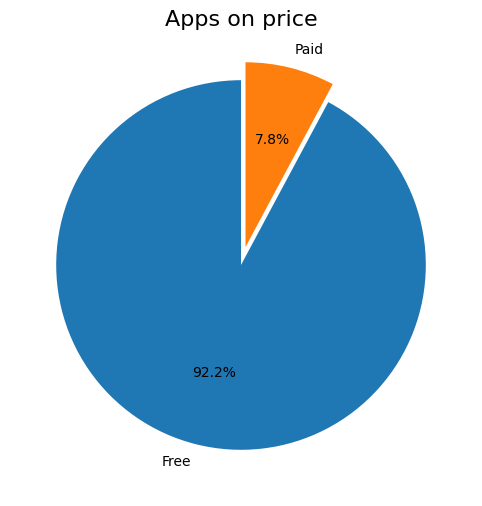

In [52]:
#pie chart on price of apps
plt.figure(figsize=(8,6))
plt.title("Apps on price",fontsize = 16)
plt.pie(price_df.Type.value_counts(), labels=price_df.Type.value_counts().index,autopct='%1.1f%%',startangle=90,explode=(0, 0.1))
plt.show()


From the above pie chart, we can draw insight that most of the apps are free (approx 92%) and paid apps (approx 7%) Listing. It may lead to fewer installations of paid apps.

### Chart - 2 pie chart

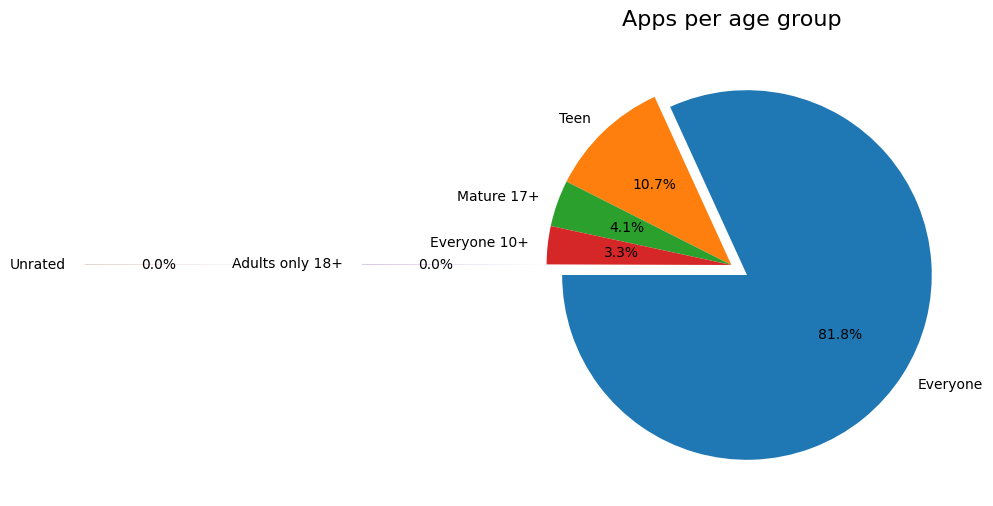

In [53]:
#age group on apps
plt.figure(figsize=(10,6))
plt.title("Apps per age group",fontsize = 16)
plt.pie(age_grouped.age_group.value_counts(), labels=age_grouped.age_group.value_counts().index,autopct='%1.1f%%',startangle=180,explode=(0.1, 0,0,0,1,2.5))
plt.show()

From the above piechart we can show that most of the apps are no age restriction mins they will gain more users, restricted apps are fewer users base

### Chart - 3 Bar plot

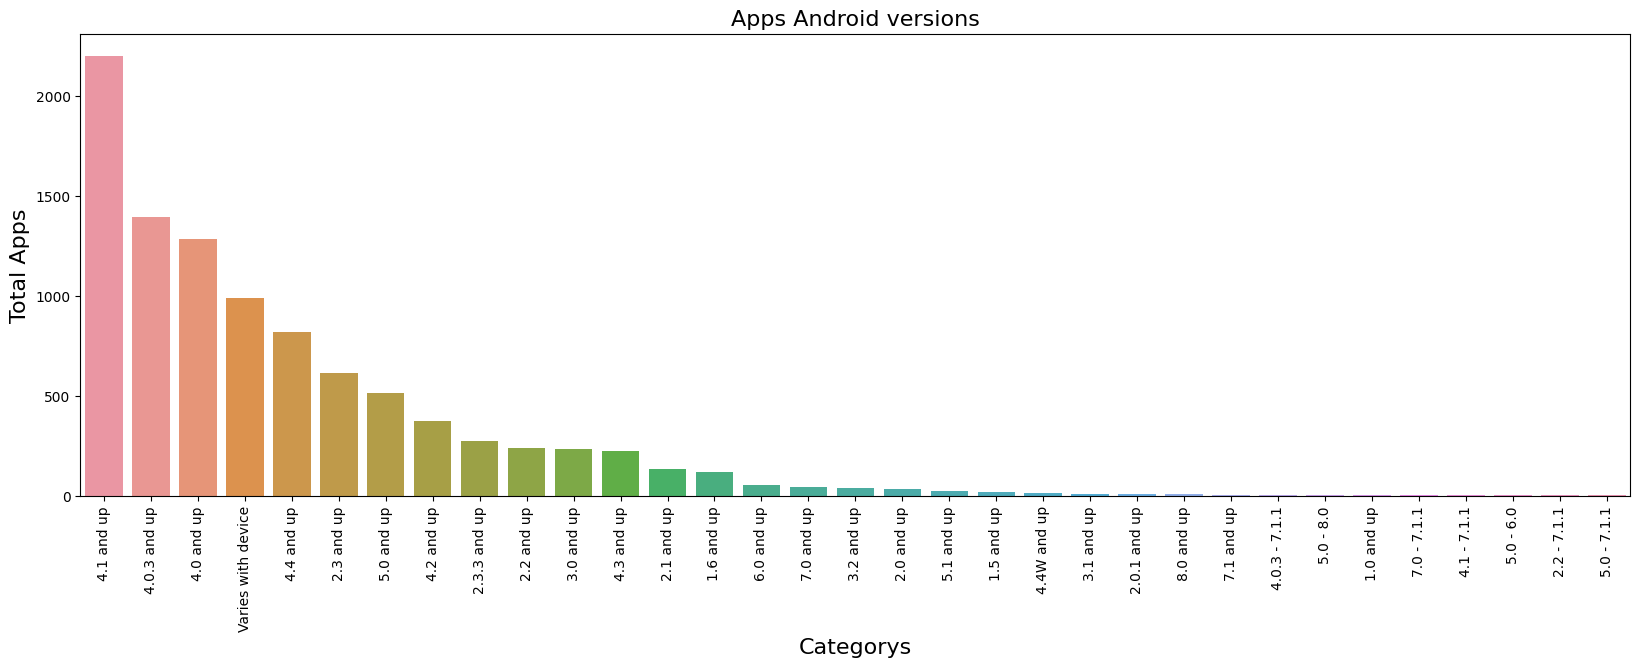

In [54]:
#total apps based on versions
plt.figure(figsize=(20,6))
plt.title("Apps Android versions",fontsize=16)
sns.barplot(data=versions,x="Android Ver",y="count")
plt.xticks(rotation= 90)
plt.xlabel('Categorys',fontsize=16)
plt.ylabel('Total Apps',fontsize=16)
plt.show()


Most of the apps are based on android version 4.1 and above but some apps are not compatible with current android versions.

### Chart - 4-Bar plot

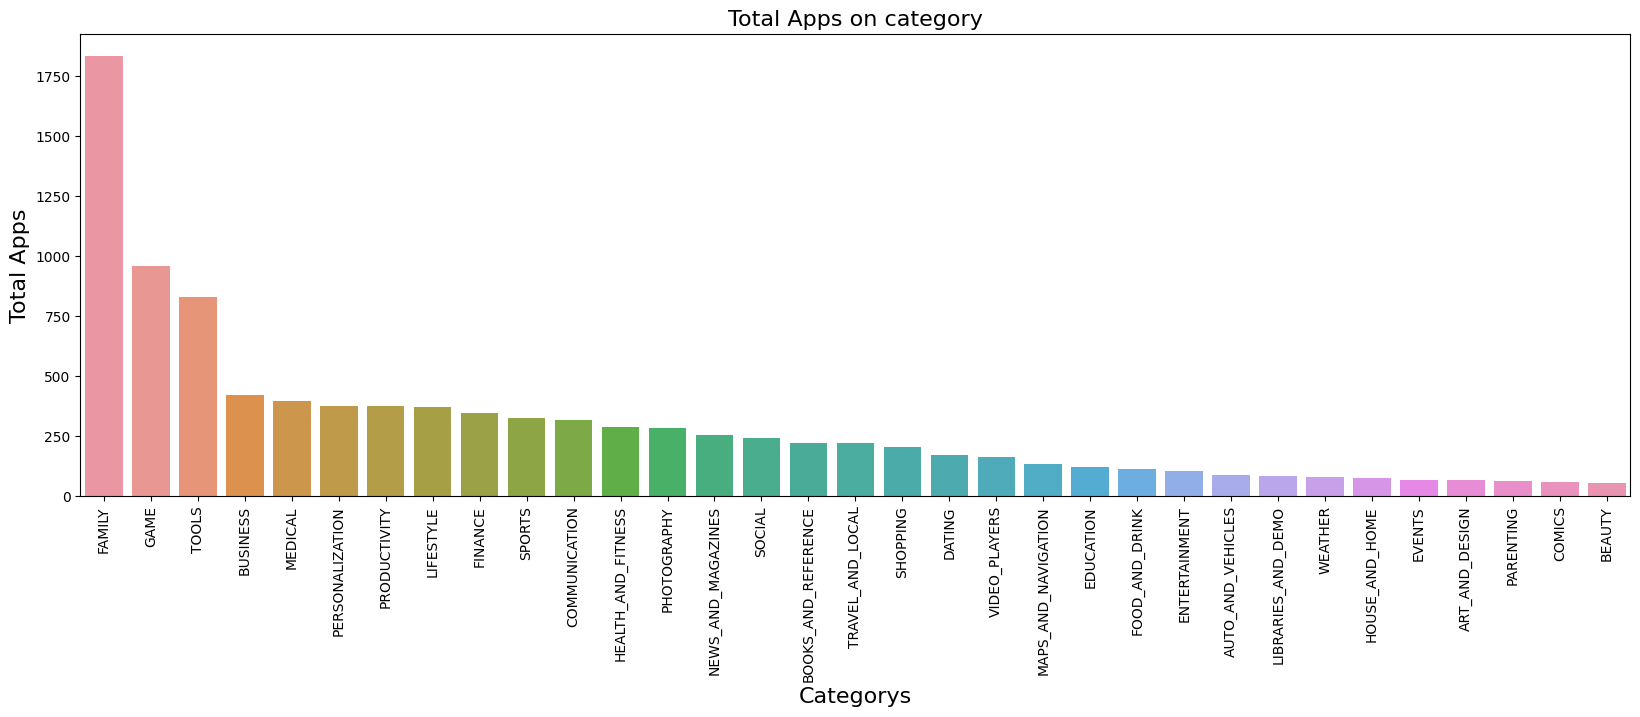

In [55]:
#bar graph on apps category
plt.figure(figsize=(20,6))
plt.title("Total Apps on category",fontsize=16)
sns.barplot(data=df,x="Category",y="Total Apps")
plt.xticks(rotation= 90)
plt.xlabel('Categorys',fontsize=16)
plt.ylabel('Total Apps',fontsize=16)
plt.show()

From this graph we can say that most of the apps are from the category family, game, tools, and beauty, comics category apps are fewer on the play store So it's better to list an app in the category like Beuty, comics, etc.

### Chart - 5 Bar plot

In [56]:
#top apps by category
category=df.sort_values(by='Total Apps', ascending=False)
top_five_category=category.head()
least_five_category=category.tail()

In [57]:
#top category
top_five_category.reset_index()

,index,Category,Total Apps
0,11,FAMILY,1832
1,14,GAME,959
2,29,TOOLS,827
3,4,BUSINESS,420
4,20,MEDICAL,395


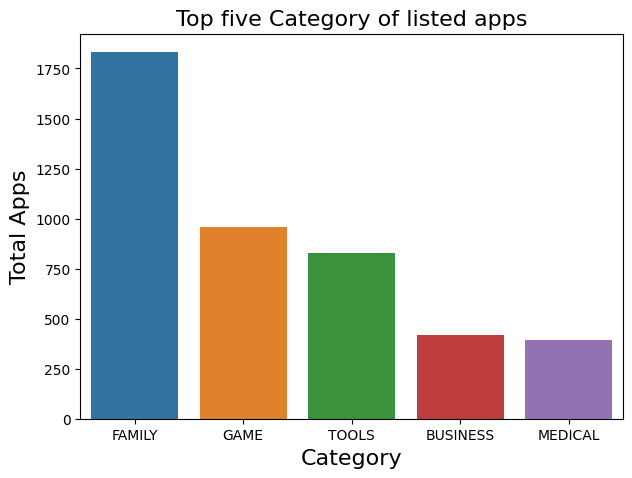

In [58]:
#bar graph of top five category
fig = plt.figure(figsize = (7, 5))
sns.barplot(data=top_five_category, x="Category", y="Total Apps")
plt.title("Top five Category of listed apps",fontsize=16)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Total Apps",fontsize=16)
plt.show()

Top Five categories on play store where most of the apps are listed.

1-Family

2-Game

3-Tools

4-Business

5-Medical

### Chart - 6 Bar plot

In [59]:
#least five category
least_five_category.reset_index()

,index,Category,Total Apps
0,10,EVENTS,64
1,0,ART_AND_DESIGN,64
2,22,PARENTING,60
3,5,COMICS,56
4,2,BEAUTY,53


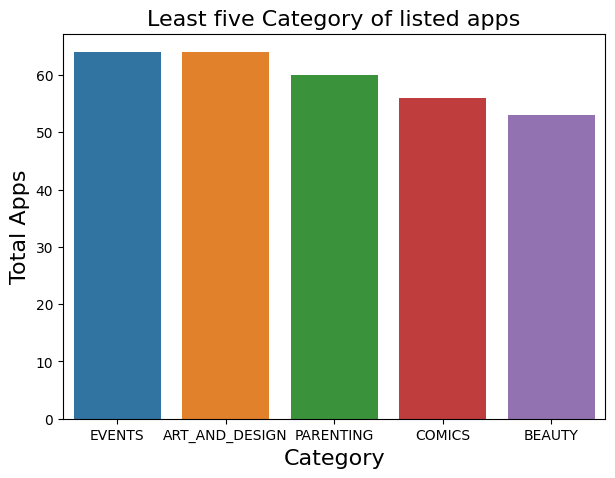

In [60]:
#bar graph on least category
fig = plt.figure(figsize = (7, 5))
sns.barplot(data=least_five_category, x="Category", y="Total Apps")
plt.title("Least five Category of listed apps",fontsize=16)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Total Apps",fontsize=16)
plt.show()

Least five categories were apps are least listed.

1-Beauty

2-Comics

3-Parenting

4-Art&Design

5-Events

### Chart - 7 Bar plot

In [61]:
#number of istalls based on category
categories= right_df.groupby('Category')["Installs"].sum().reset_index()
category_installs_sum_df=categories.sort_values(by='Installs', ascending=False)
category_installs_sum_df

,Category,Installs
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001771915
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902
24,PHOTOGRAPHY,4649147655
11,FAMILY,4427941505
31,VIDEO_PLAYERS,3926902720
30,TRAVEL_AND_LOCAL,2894887146
21,NEWS_AND_MAGAZINES,2369217760


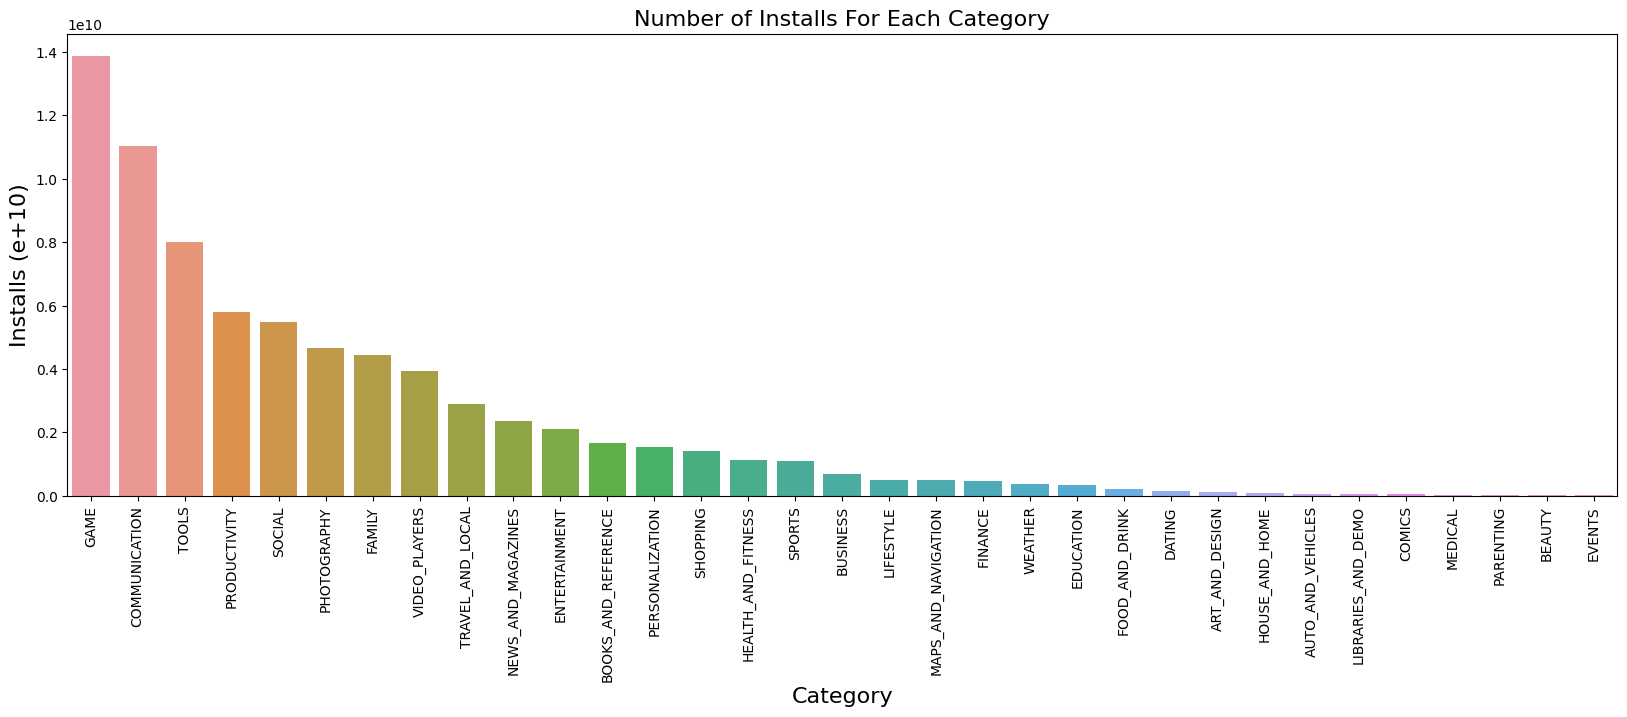

In [62]:
#bar graph on category vice installetions
plt.figure(figsize=(20, 6))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=16)
plt.ylabel('Installs (e+10)',fontsize=16)
plt.title('Number of Installs For Each Category',fontsize=16)
plt.show()

From the above visualization, we can say that it is profitable to list a game on the play store but in the category like event and beauty it may lead a negative growth of business and apps.

### Chart - 9 Histogram

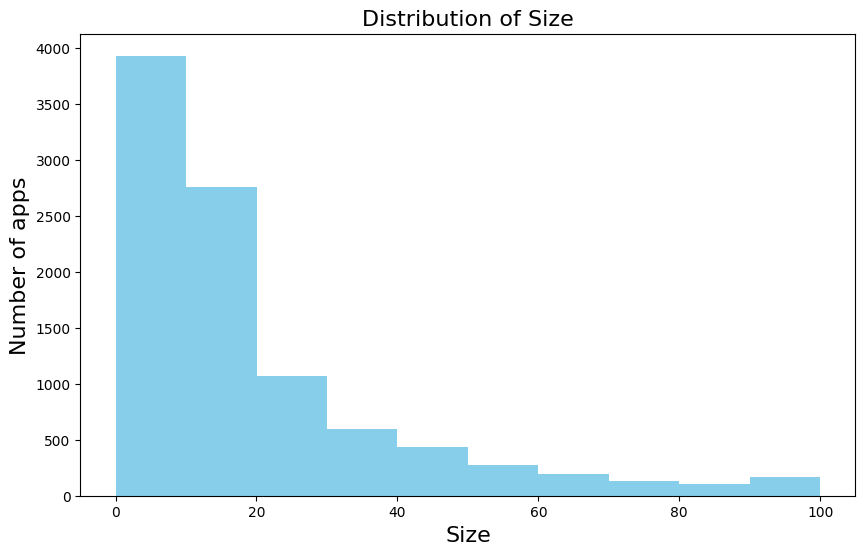

In [65]:
#histogram on size
plt.figure(figsize=(10, 6))
plt.hist(df1['Size'],color = "skyblue")
plt.xlabel("Size",fontsize=16)
plt.title("Distribution of Size",fontsize=16)
plt.ylabel("Number of apps",fontsize=16)
plt.show()

From the histogram, we can say that most of the apps are small in size between 1 Mb to 20 Mb. we can insight that if the app size is beyond this range so maybe it leads to fewer installations.

### Chart - 10 Scatterplot

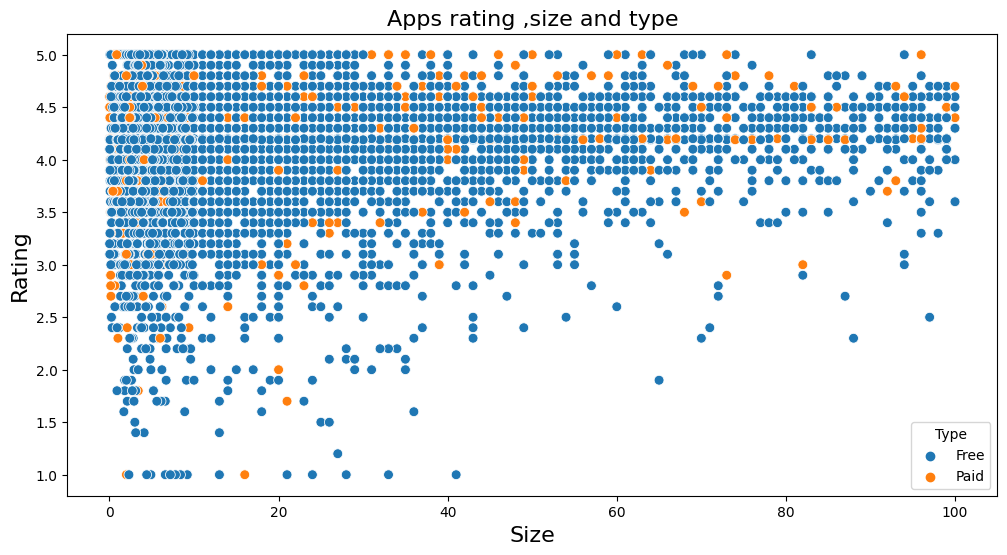

In [66]:
#scaterplot on apps rating based on price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=price_df,x=price_df['Size'],y=price_df['Rating'],hue=price_df['Type'],s=50)
plt.xlabel("Size",fontsize=16)
plt.ylabel("Rating",fontsize=16)
plt.title("Apps rating ,size and type",fontsize=16)
plt.show()

From this scatter plot, we can imply that the majority of the apps are free and small in size with a high rating. While for paid apps, we have quite equal distribution in terms of size and rating it mins if the apps are small in size it may lead to high installations and reviews.

### Chart - 11 Line Chart

In [67]:
#dataset on rating, reviews,installs,size and price
df2=df1[["Rating","Reviews","Installs","Size","Price"]]
df2

,Rating,Reviews,Installs,Size,Price
0,4.10,159,10000,19.0,0.0
1,3.90,967,500000,14.0,0.0
2,4.70,87510,5000000,8.7,0.0
3,4.50,215644,50000000,25.0,0.0
4,4.30,967,100000,2.8,0.0
...,...,...,...,...,...
10836,4.50,38,5000,53.0,0.0
10837,5.00,4,100,3.6,0.0
10838,4.19,3,1000,9.5,0.0
10839,4.50,114,1000,20.0,0.0


In [68]:
#df2 information
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    9659 non-null   float64
 1   Reviews   9659 non-null   int64  
 2   Installs  9659 non-null   int64  
 3   Size      9659 non-null   float64
 4   Price     9659 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 452.8 KB


In [69]:
#apps based on rating,reviews,installs,size and price
rating_df = df2.groupby('Rating').sum().reset_index()
rating_df

,Rating,Reviews,Installs,Size,Price
0,1.00,28,5170,228.8000,4.48
1,1.20,44,1000,27.0000,0.00
2,1.40,98,7000,20.2000,0.00
3,1.50,61,1105,54.0000,0.00
4,1.60,691,152000,64.6000,0.00
5,1.70,2360,81700,80.3000,4.99
6,1.80,3418,519500,49.0870,1.49
7,1.90,1874,189000,174.2000,0.00
8,2.00,2997,5040150,211.4000,4.59
9,2.10,3073,182000,164.2000,0.00


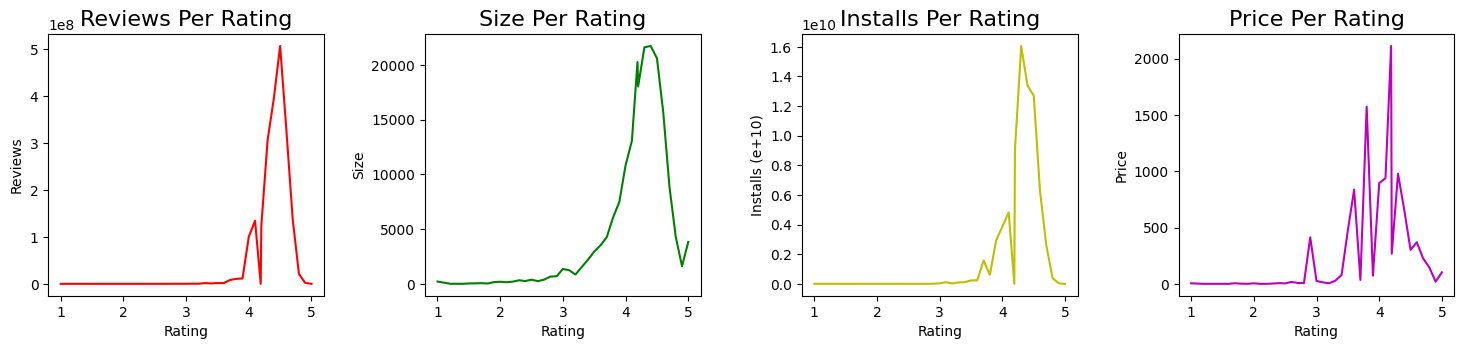

In [70]:
#graph on size,rating,review etc
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating',fontsize=16)

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating',fontsize=16)

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'y')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating',fontsize=16)

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'm')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating',fontsize=16)

plt.tight_layout(pad=2)
plt.show()

From the above plottings, we can imply that most of the apps with a higher rating range of 4.0 - 4.7 are having a high amount of reviews, sizes, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in terms of pricing even at the range of high rating. From these conclusions, we draw an insight that the popularity of apps or ratings of apps is strongly correlated with the number of reviews, the size of the app, and the number of installs.

### Chart - 13 - Pair Plot

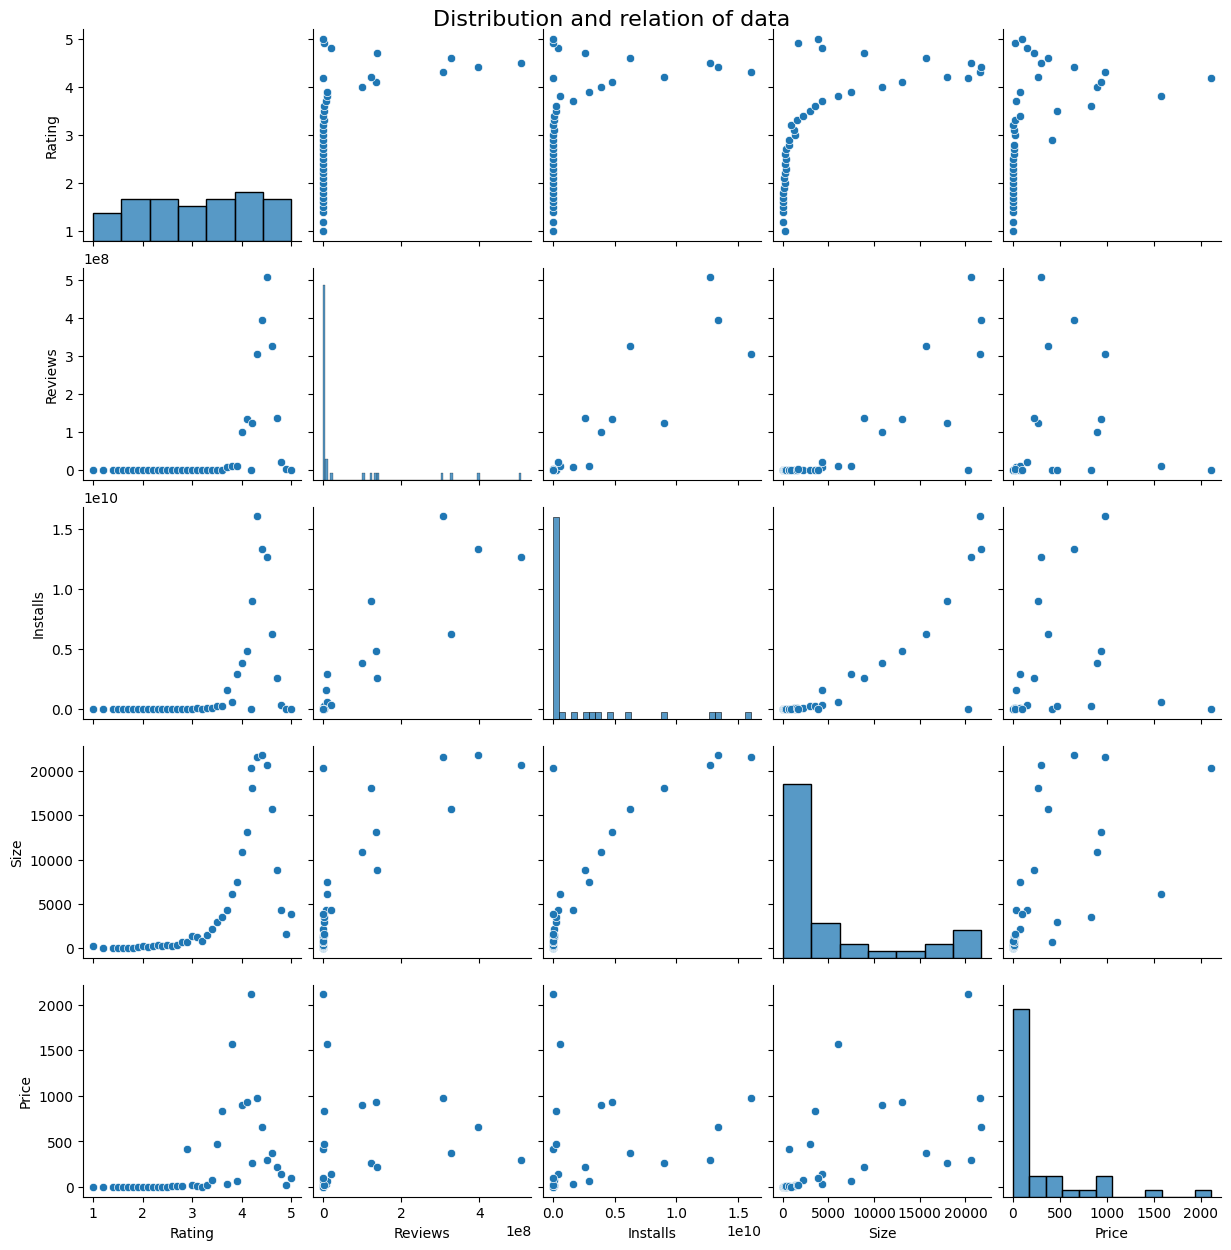

In [72]:
g=sns.pairplot(rating_df)
g.fig.suptitle("Distribution and relation of data ", y=1.00,fontsize=16)
plt.show()

Relation between Installation, size, and reviews of the apps gain a positive impact on business, and the relation between price, Installation, and Reviews has a negative impact on business.

### Chart - 14 Bar Plot

In [73]:
#installs unique values
df1["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [74]:
#set in decending order
top_installers=df1.sort_values(by='Installs', ascending=False)
top_apps_by_instolation=top_installers.head(20)

In [75]:
#top 20 apps based on installs
top_apps_by_instolation[["App","Category","Installs"]]

,App,Category,Installs
336,WhatsApp Messenger,COMMUNICATION,1000000000
152,Google Play Books,BOOKS_AND_REFERENCE,1000000000
1654,Subway Surfers,GAME,1000000000
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,1000000000
340,Gmail,COMMUNICATION,1000000000
2545,Instagram,SOCIAL,1000000000
2544,Facebook,SOCIAL,1000000000
338,Google Chrome: Fast & Secure,COMMUNICATION,1000000000
2554,Google+,SOCIAL,1000000000
3665,YouTube,VIDEO_PLAYERS,1000000000


**The top 20 apps were installed above 1 billion**



In [76]:
#total apps by category based on top installs
top_category_apps=top_apps_by_instolation.groupby("Category")["App"].count().reset_index(name="total app")
top_category_apps=top_category_apps.sort_values(by="total app",ascending=False)
top_category_apps

,Category,total app
1,COMMUNICATION,6
7,SOCIAL,3
9,TRAVEL_AND_LOCAL,2
10,VIDEO_PLAYERS,2
0,BOOKS_AND_REFERENCE,1
2,ENTERTAINMENT,1
3,GAME,1
4,NEWS_AND_MAGAZINES,1
5,PHOTOGRAPHY,1
6,PRODUCTIVITY,1


**From the category communication 6 apps installation is above one billion**

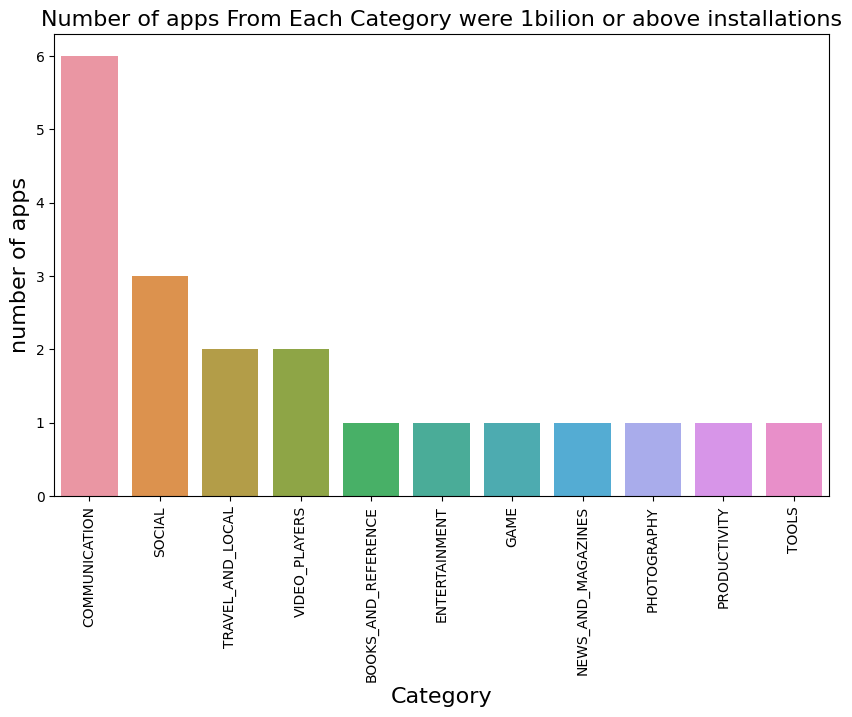

In [77]:
#bar graph on category in top installs
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='total app', data=top_category_apps)
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=16)
plt.ylabel('number of apps',fontsize=16)
plt.title('Number of apps From Each Category were 1bilion or above installations',fontsize=16)
plt.show()

**From the communication, apps were installation above one billion are-**

1-Whatsapp Messenger

2-Gmail

3-Google chrome

4-Messenger

5-skype

6-Hangouts


In [78]:
top_installers[["App"]].tail()

,App
9917,Eu Sou Rico
6692,cronometra-br
5486,AP Series Solution Pro
9719,EP Cook Book
9148,Command & Conquer: Rivals


**Least preferred or installed apps are-**

1-Eu Sou Rico	

2-cronometra-br	

3-AP Series Solution Pro

4-EP Cook Book	

5-Command & Conquer: Rivals	

In [79]:
#top five apps based on price
most_expensive_app=df1
most_expensive_app.sort_values(by="Price",ascending=False)

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating,Size
4367,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,10000,400.00,Paid,Lifestyle,Everyone,7.300
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.19,0,0,399.99,Paid,Lifestyle,Everyone,40.000
5359,I am rich(premium),FINANCE,3.50,472,5000,399.99,Paid,Finance,Everyone,0.965
5358,I am Rich!,FINANCE,3.80,93,1000,399.99,Paid,Finance,Everyone,22.000
5373,I AM RICH PRO PLUS,FINANCE,4.00,36,1000,399.99,Paid,Finance,Everyone,41.000
...,...,...,...,...,...,...,...,...,...,...
4078,Moto LED for Moto X & E [Root],LIFESTYLE,3.40,4082,500000,0.00,Free,Lifestyle,Everyone,0.318
4079,Mobile Security & Antivirus,PRODUCTIVITY,4.70,564759,10000000,0.00,Free,Productivity,Everyone,20.000
4080,Lookout Security & Antivirus,TOOLS,4.40,951413,100000000,0.00,Free,Tools,Everyone,13.000
4081,World History Quick e-Book,FAMILY,4.40,1657,100000,0.00,Free,Education;Education,Everyone,4.900


**Top most expensive apps are-**

1-I'm Rich - Trump Edition	

2-I'm Rich/Eu sou Rico/أنا غني/我很有錢	

3-I am rich(premium)	

4-I am Rich!

5-I AM RICH PRO PLUS	

In [80]:
#top five apps based on reviews
apps_Reviews=df1.sort_values(by='Reviews', ascending=False)
apps_Reviews[["App","Reviews"]].head()

,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723


**Top reviewed apps-**

1-Facebook

2-WhatsApp Messenger

3-Instagram

4-Messenger – Text and Video Chat for Free	

5-Clash of Clans

In [81]:
#top app in game category
df = df1[df1['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df[["App","Category","Installs"]].head()

,App,Category,Installs
1654,Subway Surfers,GAME,1000000000
1655,Candy Crush Saga,GAME,500000000
1661,Temple Run 2,GAME,500000000
1662,Pou,GAME,500000000
1722,My Talking Tom,GAME,500000000


**Top apps from Game category-**

1-Subway Surfers

2-Candy Crush Saga

3-Temple Run 2

4-Pou

5-My Talking Tom

In [82]:
#least preferd apps in family category
df = df1[df1['Category'] == 'FAMILY']
df = df.sort_values(by=['Rating'], ascending=True)
df[["App","Category","Installs","Rating"]].head()

,App,Category,Installs,Rating
5978,Truck Driving Test Class 3 BC,FAMILY,50,1.0
10324,FE Mechanical Engineering Prep,FAMILY,1000,1.0
4127,Speech Therapy: F,FAMILY,10,1.0
4905,AC REMOTE UNIVERSAL-PRO,FAMILY,100000,1.6
9176,EB Mobile,FAMILY,10000,1.7


**Least rating apps from the family category are-**

1-Truck Driving Test Class 3 BC	

2-FE Mechanical Engineering Prep

3-Speech Therapy: F	

4-AC REMOTE UNIVERSAL-PRO	

5-EB Mobile	

In [83]:
#top genres on installs
Genres= df1.groupby("Genres")["Installs"].sum().reset_index()
Genres1= Genres.sort_values(by=['Installs'], ascending=False)
Genres1.head()

,Genres,Installs
35,Communication,11038276251
107,Tools,7991771915
81,Productivity,5793091369
100,Social,5487867902
80,Photography,4649147655


**Top genres that most people like are-**

1-Communication

2-Tools

3-Productivity

4-Social

5-Photography

In [84]:
#least genres
Genres1.tail()

,Genres,Installs
21,Books & Reference;Education,11000
93,Role Playing;Education,100
112,Trivia;Education,100
18,Board;Pretend Play,100
20,Books & Reference;Creativity,100


**Least preferd genres apps are-**

1-Books & Reference;Education

2-Role Playing;Education	

3-Trivia;Education	

4-Board;Pretend Play

5-Books & Reference;Creativity


# **Dataset-2**

In [85]:
#dataset two top rows
ps_df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [86]:
#last five rows
ps_df2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [87]:
#shape of data
ps_df2.shape

(64295, 5)

In [88]:
#basic info
ps_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [89]:
#basic statistics
ps_df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


**What is a Sentiment polarity?**

Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

**What is a sentiment Subjectivity**

Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

### Chart - 15 Histogram


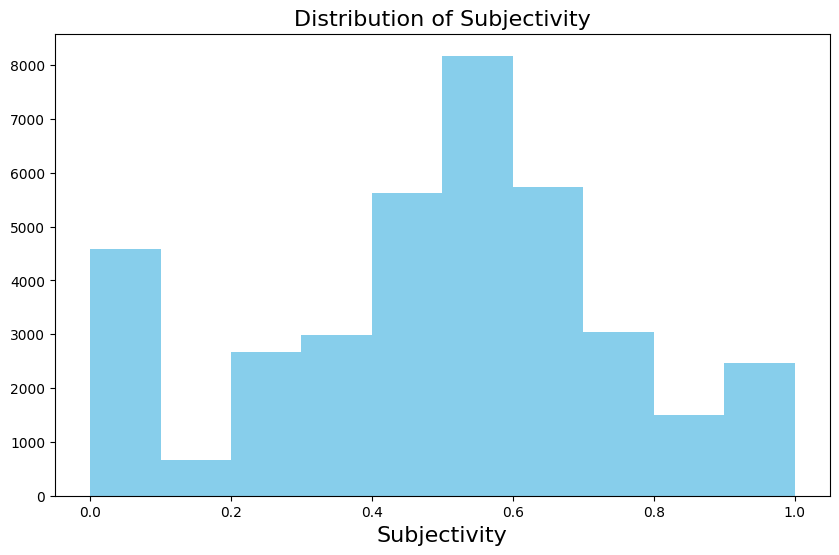

In [90]:
#histogram based on subjectivity
plt.figure(figsize=(10,6))
plt.hist(ps_df2[ps_df2['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'],color = "skyblue")
plt.xlabel("Subjectivity",fontsize=16)
plt.title("Distribution of Subjectivity",fontsize=16)
plt.show()

From the above histogram insight that the most people rate apps on basis of their own experience with the apps.

### Chart - 18 Pie Chart

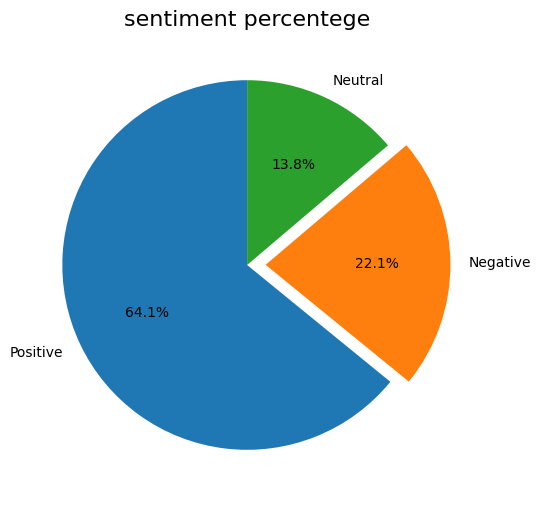

In [93]:
#sentiment percentage
plt.figure(figsize=(8,6))
plt.title("sentiment percentege",fontsize = 16)
plt.pie(ps_df2.Sentiment.value_counts(), labels=ps_df2.Sentiment.value_counts().index,autopct='%1.1f%%',startangle=90,explode=(0,0.1,0))
plt.show()


From the above plot that the number of positive reviews(64%) are way higher than negative(22%) and neutral ones.